<a href="https://colab.research.google.com/github/Keyrama/Machine-Learning/blob/main/Keras_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [154]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.88333, random_state=42)

print(f'Training set: {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_valid.shape}, {y_valid.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

Training set: (7000, 28, 28), (7000,)
Validation set: (53000, 28, 28), (53000,)
Test set: (10000, 28, 28), (10000,)


In [155]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [156]:
#predictions = model(x_train[:1]).numpy()
#predictions

In [157]:
#tf.nn.softmax(predictions).numpy()

In [158]:
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss_fn(y_train[:1], predictions).numpy()
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                                          validation_data=(x_valid, y_valid))


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.4764 - loss: 1.5446 - val_accuracy: 0.8793 - val_loss: 0.4192
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8390 - loss: 0.5253 - val_accuracy: 0.9144 - val_loss: 0.2897
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8965 - loss: 0.3443 - val_accuracy: 0.9248 - val_loss: 0.2533
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9143 - loss: 0.2865 - val_accuracy: 0.9297 - val_loss: 0.2362
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9374 - loss: 0.2345 - val_accuracy: 0.9361 - val_loss: 0.2201
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9427 - loss: 0.1946 - val_accuracy: 0.9404 - val_loss: 0.2116
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9461 - loss: 0.1778 - val_accuracy: 0.9426 - val_loss: 0.2099
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9605 - loss: 0.1399 - val_acc

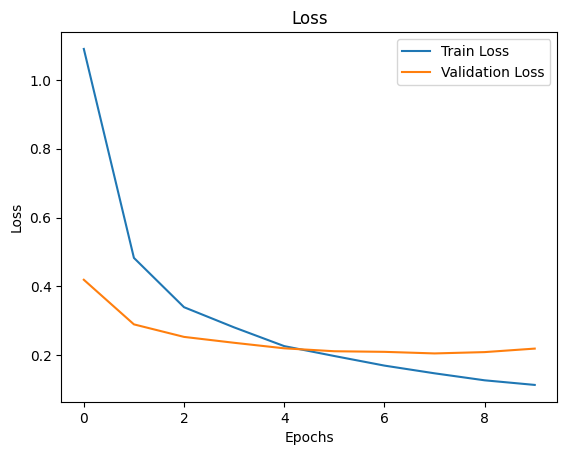

In [159]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [160]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9460 - loss: 0.2019


[0.20186221599578857, 0.9459999799728394]

In [161]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [162]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533684, 0.08533691, 0.08533687, 0.08533686, 0.08533682,
        0.08533681, 0.08533681, 0.23196821, 0.08533686, 0.08533696],
       [0.08533856, 0.08533826, 0.23194923, 0.08534446, 0.08533804,
        0.08533802, 0.08533817, 0.08533918, 0.08533806, 0.08533801],
       [0.08533744, 0.23196039, 0.08533844, 0.08533835, 0.08533732,
        0.08533733, 0.08533737, 0.08533792, 0.08533794, 0.08533757],
       [0.23196927, 0.08533675, 0.08533676, 0.08533675, 0.08533675,
        0.08533675, 0.08533675, 0.08533675, 0.08533675, 0.08533675],
       [0.08535144, 0.08535108, 0.08535342, 0.08535115, 0.23174302,
        0.08535273, 0.08535773, 0.08536771, 0.08535158, 0.08542021]],
      dtype=float32)>